In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 

from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance
import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.callbacks import EarlyStopping



df = pd.read_csv('data.csv')



list = ['Unnamed: 32','id']
df.drop(list,axis = 1, inplace = True)


#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['diagnosis'] = labelencoder.fit_transform(df['diagnosis'])


from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df['radius_mean'] = ss.fit_transform(df['radius_mean'].values.reshape(-1,1))
df['texture_mean'] = ss.fit_transform(df['texture_mean'].values.reshape(-1,1))
df['perimeter_mean'] = ss.fit_transform(df['perimeter_mean'].values.reshape(-1,1))
df['area_mean'] = ss.fit_transform(df['area_mean'].values.reshape(-1,1))
df['perimeter_se'] = ss.fit_transform(df['perimeter_se'].values.reshape(-1,1))
df['area_se'] = ss.fit_transform(df['area_se'].values.reshape(-1,1))
df['radius_worst'] = ss.fit_transform(df['radius_worst'].values.reshape(-1,1))
df['texture_worst'] = ss.fit_transform(df['texture_worst'].values.reshape(-1,1))
df['perimeter_worst'] = ss.fit_transform(df['perimeter_worst'].values.reshape(-1,1))
df['area_worst'] = ss.fit_transform(df['area_worst'].values.reshape(-1,1))


df_1 = pd.DataFrame(df['diagnosis'])

df.drop(['diagnosis'], axis =1, inplace = True)

df_2 = pd.DataFrame(df[['radius_mean', 'texture_mean', 'perimeter_mean', 
                        'smoothness_mean', 'area_mean', 'concavity_mean', 
                        'compactness_mean', 'texture_se', 'area_se', 'fractal_dimension_mean']])


from sklearn.decomposition import PCA
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df_2), columns=df_2.columns)


X = df_pca
Y = df_1['diagnosis']


#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, 
                                                    stratify = Y)

X_train_train, X_test_test, Y_train_train, Y_test_test = train_test_split(X_train, Y_train, test_size = 0.20)




sm = SMOTE(random_state=42, kind = 'borderline1')

X_resampled, Y_resampled = sm.fit_resample(X_train_train, Y_train_train)


from sklearn.metrics import f1_score


callbacks = [EarlyStopping(monitor='val_loss',mode='min',patience=2, restore_best_weights = True)]

def base_model():
    model = Sequential()
    model.add(Dense(30, input_dim=len(df_2.columns),kernel_initializer = 'he_normal', activation='relu'))
    model.add(Dense(1, kernel_initializer = 'he_normal',activation='sigmoid'))
    
    model.compile(keras.optimizers.Adam(lr=0.004),'binary_crossentropy',metrics=['accuracy'])
    return model

   

results_control_accuracy = []
for i in range(0, 16):
    my_model = KerasClassifier(build_fn=base_model)    
    history = my_model.fit(X_resampled, Y_resampled, callbacks = callbacks,
          epochs=60,validation_data = (X_test_test, Y_test_test),
          batch_size=256)
    
    y_test_pred= my_model.predict(X_test) > 0.5
    
    f1 = f1_score(Y_test, y_test_pred)
    
    results_control_accuracy.append(f1)
    
print(results_control_accuracy)

Using TensorFlow backend.
/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


Train on 460 samples, validate on 91 samples
Epoch 1/60
460/460 [==============================] - 0s 427us/step - loss: 1.4160 - acc: 0.2500 - val_loss: 1.3483 - val_acc: 0.1209
Epoch 2/60
460/460 [==============================] - 0s 15us/step - loss: 1.3404 - acc: 0.2826 - val_loss: 1.2723 - val_acc: 0.1429
Epoch 3/60
460/460 [==============================] - 0s 11us/step - loss: 1.2588 - acc: 0.2913 - val_loss: 1.1971 - val_acc: 0.1538
Epoch 4/60
460/460 [==============================] - 0s 18us/step - loss: 1.1829 - acc: 0.3043 - val_loss: 1.1246 - val_acc: 0.1868
Epoch 5/60
460/460 [==============================] - 0s 13us/step - loss: 1.1099 - acc: 0.3196 - val_loss: 1.0545 - val_acc: 0.1758
Epoch 6/60
460/460 [==============================] - 0s 12us/step - loss: 1.0366 - acc: 0.3196 - val_loss: 0.9875 - val_acc: 0.2308
Epoch 7/60
460/460 [==============================] - 0s 10us/step - loss: 0.9715 - acc: 0.3348 - val_loss: 0.9240 - val_acc: 0.2967
Epoch 8/60
460/460 [===

460/460 [==============================] - 0s 464us/step - loss: 0.5821 - acc: 0.6587 - val_loss: 0.5536 - val_acc: 0.6593
Epoch 2/60
460/460 [==============================] - 0s 7us/step - loss: 0.5569 - acc: 0.7152 - val_loss: 0.5255 - val_acc: 0.7692
Epoch 3/60
460/460 [==============================] - 0s 10us/step - loss: 0.5350 - acc: 0.7500 - val_loss: 0.4987 - val_acc: 0.8022
Epoch 4/60
460/460 [==============================] - 0s 12us/step - loss: 0.5144 - acc: 0.7978 - val_loss: 0.4738 - val_acc: 0.8352
Epoch 5/60
460/460 [==============================] - 0s 8us/step - loss: 0.4974 - acc: 0.8196 - val_loss: 0.4512 - val_acc: 0.8791
Epoch 6/60
460/460 [==============================] - 0s 8us/step - loss: 0.4801 - acc: 0.8391 - val_loss: 0.4307 - val_acc: 0.8791
Epoch 7/60
460/460 [==============================] - 0s 11us/step - loss: 0.4662 - acc: 0.8478 - val_loss: 0.4118 - val_acc: 0.9121
Epoch 8/60
460/460 [==============================] - 0s 9us/step - loss: 0.4534 -

460/460 [==============================] - 0s 7us/step - loss: 0.6595 - acc: 0.6022 - val_loss: 0.6498 - val_acc: 0.6044
Epoch 3/60
460/460 [==============================] - 0s 11us/step - loss: 0.6259 - acc: 0.6565 - val_loss: 0.6127 - val_acc: 0.7033
Epoch 4/60
460/460 [==============================] - 0s 10us/step - loss: 0.5958 - acc: 0.7000 - val_loss: 0.5795 - val_acc: 0.7582
Epoch 5/60
460/460 [==============================] - 0s 11us/step - loss: 0.5702 - acc: 0.7696 - val_loss: 0.5500 - val_acc: 0.7912
Epoch 6/60
460/460 [==============================] - 0s 9us/step - loss: 0.5472 - acc: 0.8130 - val_loss: 0.5234 - val_acc: 0.8352
Epoch 7/60
460/460 [==============================] - 0s 9us/step - loss: 0.5281 - acc: 0.8261 - val_loss: 0.4995 - val_acc: 0.8681
Epoch 8/60
460/460 [==============================] - 0s 10us/step - loss: 0.5105 - acc: 0.8391 - val_loss: 0.4781 - val_acc: 0.8901
Epoch 9/60
460/460 [==============================] - 0s 10us/step - loss: 0.4955 -

460/460 [==============================] - 0s 12us/step - loss: 0.6865 - acc: 0.5870 - val_loss: 0.6449 - val_acc: 0.7143
Epoch 4/60
460/460 [==============================] - 0s 13us/step - loss: 0.6383 - acc: 0.7000 - val_loss: 0.6020 - val_acc: 0.7692
Epoch 5/60
460/460 [==============================] - 0s 10us/step - loss: 0.5990 - acc: 0.7783 - val_loss: 0.5637 - val_acc: 0.8791
Epoch 6/60
460/460 [==============================] - 0s 9us/step - loss: 0.5635 - acc: 0.8196 - val_loss: 0.5293 - val_acc: 0.9121
Epoch 7/60
460/460 [==============================] - 0s 11us/step - loss: 0.5350 - acc: 0.8326 - val_loss: 0.4986 - val_acc: 0.9231
Epoch 8/60
460/460 [==============================] - 0s 8us/step - loss: 0.5099 - acc: 0.8478 - val_loss: 0.4708 - val_acc: 0.9231
Epoch 9/60
460/460 [==============================] - 0s 9us/step - loss: 0.4882 - acc: 0.8522 - val_loss: 0.4457 - val_acc: 0.9231
Epoch 10/60
460/460 [==============================] - 0s 13us/step - loss: 0.4687 

460/460 [==============================] - 0s 12us/step - loss: 0.4753 - acc: 0.7783 - val_loss: 0.4179 - val_acc: 0.8791
Epoch 5/60
460/460 [==============================] - 0s 10us/step - loss: 0.4593 - acc: 0.7783 - val_loss: 0.3959 - val_acc: 0.8791
Epoch 6/60
460/460 [==============================] - 0s 11us/step - loss: 0.4452 - acc: 0.7848 - val_loss: 0.3757 - val_acc: 0.8901
Epoch 7/60
460/460 [==============================] - 0s 12us/step - loss: 0.4323 - acc: 0.7891 - val_loss: 0.3573 - val_acc: 0.8901
Epoch 8/60
460/460 [==============================] - 0s 9us/step - loss: 0.4210 - acc: 0.7913 - val_loss: 0.3406 - val_acc: 0.8901
Epoch 9/60
460/460 [==============================] - 0s 11us/step - loss: 0.4106 - acc: 0.7913 - val_loss: 0.3252 - val_acc: 0.8901
Epoch 10/60
460/460 [==============================] - 0s 10us/step - loss: 0.4015 - acc: 0.7978 - val_loss: 0.3114 - val_acc: 0.8901
Epoch 11/60
460/460 [==============================] - 0s 10us/step - loss: 0.39

460/460 [==============================] - 0s 11us/step - loss: 0.5798 - acc: 0.6978 - val_loss: 0.5077 - val_acc: 0.7912
Epoch 6/60
460/460 [==============================] - 0s 9us/step - loss: 0.5453 - acc: 0.7261 - val_loss: 0.4759 - val_acc: 0.8022
Epoch 7/60
460/460 [==============================] - 0s 11us/step - loss: 0.5154 - acc: 0.7391 - val_loss: 0.4476 - val_acc: 0.8462
Epoch 8/60
460/460 [==============================] - 0s 12us/step - loss: 0.4916 - acc: 0.7565 - val_loss: 0.4223 - val_acc: 0.8462
Epoch 9/60
460/460 [==============================] - 0s 8us/step - loss: 0.4689 - acc: 0.7587 - val_loss: 0.3998 - val_acc: 0.8462
Epoch 10/60
460/460 [==============================] - 0s 10us/step - loss: 0.4506 - acc: 0.7696 - val_loss: 0.3799 - val_acc: 0.8352
Epoch 11/60
460/460 [==============================] - 0s 9us/step - loss: 0.4331 - acc: 0.7935 - val_loss: 0.3621 - val_acc: 0.8462
Epoch 12/60
460/460 [==============================] - 0s 8us/step - loss: 0.4207

460/460 [==============================] - 0s 8us/step - loss: 0.5144 - acc: 0.7957 - val_loss: 0.4549 - val_acc: 0.9341
Epoch 7/60
460/460 [==============================] - 0s 11us/step - loss: 0.4957 - acc: 0.7870 - val_loss: 0.4306 - val_acc: 0.9451
Epoch 8/60
460/460 [==============================] - 0s 11us/step - loss: 0.4783 - acc: 0.7870 - val_loss: 0.4086 - val_acc: 0.9451
Epoch 9/60
460/460 [==============================] - 0s 8us/step - loss: 0.4640 - acc: 0.7891 - val_loss: 0.3885 - val_acc: 0.9560
Epoch 10/60
460/460 [==============================] - 0s 16us/step - loss: 0.4499 - acc: 0.7848 - val_loss: 0.3704 - val_acc: 0.9451
Epoch 11/60
460/460 [==============================] - 0s 8us/step - loss: 0.4383 - acc: 0.7848 - val_loss: 0.3538 - val_acc: 0.9341
Epoch 12/60
460/460 [==============================] - 0s 11us/step - loss: 0.4272 - acc: 0.7913 - val_loss: 0.3390 - val_acc: 0.9341
Epoch 13/60
460/460 [==============================] - 0s 9us/step - loss: 0.417

460/460 [==============================] - 0s 10us/step - loss: 0.4731 - acc: 0.8217 - val_loss: 0.4199 - val_acc: 0.8681
Epoch 8/60
460/460 [==============================] - 0s 12us/step - loss: 0.4561 - acc: 0.8283 - val_loss: 0.3986 - val_acc: 0.8791
Epoch 9/60
460/460 [==============================] - 0s 9us/step - loss: 0.4416 - acc: 0.8304 - val_loss: 0.3792 - val_acc: 0.9011
Epoch 10/60
460/460 [==============================] - 0s 12us/step - loss: 0.4285 - acc: 0.8478 - val_loss: 0.3617 - val_acc: 0.9121
Epoch 11/60
460/460 [==============================] - 0s 10us/step - loss: 0.4162 - acc: 0.8478 - val_loss: 0.3460 - val_acc: 0.9231
Epoch 12/60
460/460 [==============================] - 0s 8us/step - loss: 0.4061 - acc: 0.8522 - val_loss: 0.3319 - val_acc: 0.9231
Epoch 13/60
460/460 [==============================] - 0s 10us/step - loss: 0.3970 - acc: 0.8587 - val_loss: 0.3190 - val_acc: 0.9231
Epoch 14/60
460/460 [==============================] - 0s 8us/step - loss: 0.3

460/460 [==============================] - 0s 11us/step - loss: 0.5021 - acc: 0.7978 - val_loss: 0.4325 - val_acc: 0.9011
Epoch 9/60
460/460 [==============================] - 0s 11us/step - loss: 0.4779 - acc: 0.8130 - val_loss: 0.4075 - val_acc: 0.9121
Epoch 10/60
460/460 [==============================] - 0s 11us/step - loss: 0.4580 - acc: 0.8065 - val_loss: 0.3854 - val_acc: 0.9011
Epoch 11/60
460/460 [==============================] - 0s 8us/step - loss: 0.4401 - acc: 0.8065 - val_loss: 0.3662 - val_acc: 0.9121
Epoch 12/60
460/460 [==============================] - 0s 9us/step - loss: 0.4253 - acc: 0.8087 - val_loss: 0.3492 - val_acc: 0.9121
Epoch 13/60
460/460 [==============================] - 0s 11us/step - loss: 0.4133 - acc: 0.8174 - val_loss: 0.3342 - val_acc: 0.9121
Epoch 14/60
460/460 [==============================] - 0s 8us/step - loss: 0.4028 - acc: 0.8217 - val_loss: 0.3206 - val_acc: 0.9341
Epoch 15/60
460/460 [==============================] - 0s 12us/step - loss: 0.

460/460 [==============================] - 0s 8us/step - loss: 0.5472 - acc: 0.7478 - val_loss: 0.4929 - val_acc: 0.8352
Epoch 10/60
460/460 [==============================] - 0s 11us/step - loss: 0.5271 - acc: 0.7630 - val_loss: 0.4715 - val_acc: 0.8571
Epoch 11/60
460/460 [==============================] - 0s 9us/step - loss: 0.5093 - acc: 0.7674 - val_loss: 0.4520 - val_acc: 0.8681
Epoch 12/60
460/460 [==============================] - 0s 10us/step - loss: 0.4941 - acc: 0.7696 - val_loss: 0.4342 - val_acc: 0.8791
Epoch 13/60
460/460 [==============================] - 0s 10us/step - loss: 0.4791 - acc: 0.7739 - val_loss: 0.4179 - val_acc: 0.8901
Epoch 14/60
460/460 [==============================] - 0s 9us/step - loss: 0.4664 - acc: 0.7935 - val_loss: 0.4027 - val_acc: 0.9011
Epoch 15/60
460/460 [==============================] - 0s 11us/step - loss: 0.4542 - acc: 0.8152 - val_loss: 0.3890 - val_acc: 0.9011
Epoch 16/60
460/460 [==============================] - 0s 8us/step - loss: 0.

460/460 [==============================] - 0s 10us/step - loss: 0.4130 - acc: 0.8239 - val_loss: 0.3528 - val_acc: 0.9341
Epoch 11/60
460/460 [==============================] - 0s 12us/step - loss: 0.4017 - acc: 0.8239 - val_loss: 0.3364 - val_acc: 0.9341
Epoch 12/60
460/460 [==============================] - 0s 11us/step - loss: 0.3922 - acc: 0.8217 - val_loss: 0.3218 - val_acc: 0.9341
Epoch 13/60
460/460 [==============================] - 0s 9us/step - loss: 0.3840 - acc: 0.8196 - val_loss: 0.3087 - val_acc: 0.9341
Epoch 14/60
460/460 [==============================] - 0s 10us/step - loss: 0.3765 - acc: 0.8217 - val_loss: 0.2973 - val_acc: 0.9341
Epoch 15/60
460/460 [==============================] - 0s 9us/step - loss: 0.3695 - acc: 0.8196 - val_loss: 0.2873 - val_acc: 0.9341
Epoch 16/60
460/460 [==============================] - 0s 11us/step - loss: 0.3634 - acc: 0.8196 - val_loss: 0.2786 - val_acc: 0.9341
Epoch 17/60
460/460 [==============================] - 0s 9us/step - loss: 0

460/460 [==============================] - 0s 11us/step - loss: 0.3675 - acc: 0.8565 - val_loss: 0.2696 - val_acc: 0.9560
Epoch 12/60
460/460 [==============================] - 0s 9us/step - loss: 0.3610 - acc: 0.8565 - val_loss: 0.2613 - val_acc: 0.9560
Epoch 13/60
460/460 [==============================] - 0s 10us/step - loss: 0.3555 - acc: 0.8587 - val_loss: 0.2538 - val_acc: 0.9560
Epoch 14/60
460/460 [==============================] - 0s 11us/step - loss: 0.3509 - acc: 0.8587 - val_loss: 0.2474 - val_acc: 0.9560
Epoch 15/60
460/460 [==============================] - 0s 8us/step - loss: 0.3464 - acc: 0.8587 - val_loss: 0.2417 - val_acc: 0.9560
Epoch 16/60
460/460 [==============================] - 0s 10us/step - loss: 0.3421 - acc: 0.8587 - val_loss: 0.2369 - val_acc: 0.9560
Epoch 17/60
460/460 [==============================] - 0s 10us/step - loss: 0.3389 - acc: 0.8565 - val_loss: 0.2326 - val_acc: 0.9560
Epoch 18/60
460/460 [==============================] - 0s 9us/step - loss: 0

460/460 [==============================] - 0s 11us/step - loss: 0.4349 - acc: 0.8174 - val_loss: 0.3688 - val_acc: 0.9011
Epoch 13/60
460/460 [==============================] - 0s 10us/step - loss: 0.4255 - acc: 0.8196 - val_loss: 0.3554 - val_acc: 0.9011
Epoch 14/60
460/460 [==============================] - 0s 11us/step - loss: 0.4167 - acc: 0.8261 - val_loss: 0.3434 - val_acc: 0.9121
Epoch 15/60
460/460 [==============================] - 0s 11us/step - loss: 0.4092 - acc: 0.8261 - val_loss: 0.3323 - val_acc: 0.9121
Epoch 16/60
460/460 [==============================] - 0s 9us/step - loss: 0.4018 - acc: 0.8283 - val_loss: 0.3220 - val_acc: 0.9121
Epoch 17/60
460/460 [==============================] - 0s 11us/step - loss: 0.3953 - acc: 0.8304 - val_loss: 0.3130 - val_acc: 0.9231
Epoch 18/60
460/460 [==============================] - 0s 8us/step - loss: 0.3892 - acc: 0.8370 - val_loss: 0.3045 - val_acc: 0.9341
Epoch 19/60
460/460 [==============================] - 0s 9us/step - loss: 0

460/460 [==============================] - 0s 8us/step - loss: 0.3688 - acc: 0.8478 - val_loss: 0.2719 - val_acc: 0.9341
Epoch 14/60
460/460 [==============================] - 0s 11us/step - loss: 0.3638 - acc: 0.8522 - val_loss: 0.2652 - val_acc: 0.9341
Epoch 15/60
460/460 [==============================] - 0s 10us/step - loss: 0.3595 - acc: 0.8522 - val_loss: 0.2592 - val_acc: 0.9341
Epoch 16/60
460/460 [==============================] - 0s 10us/step - loss: 0.3553 - acc: 0.8522 - val_loss: 0.2540 - val_acc: 0.9341
Epoch 17/60
460/460 [==============================] - 0s 11us/step - loss: 0.3511 - acc: 0.8565 - val_loss: 0.2494 - val_acc: 0.9341
Epoch 18/60
460/460 [==============================] - 0s 8us/step - loss: 0.3474 - acc: 0.8587 - val_loss: 0.2453 - val_acc: 0.9451
Epoch 19/60
460/460 [==============================] - 0s 8us/step - loss: 0.3440 - acc: 0.8587 - val_loss: 0.2414 - val_acc: 0.9451
Epoch 20/60
460/460 [==============================] - 0s 11us/step - loss: 0

460/460 [==============================] - 0s 11us/step - loss: 0.4019 - acc: 0.7978 - val_loss: 0.3049 - val_acc: 0.8901
Epoch 15/60
460/460 [==============================] - 0s 10us/step - loss: 0.3957 - acc: 0.7935 - val_loss: 0.2944 - val_acc: 0.9011
Epoch 16/60
460/460 [==============================] - 0s 10us/step - loss: 0.3898 - acc: 0.7935 - val_loss: 0.2851 - val_acc: 0.9121
Epoch 17/60
460/460 [==============================] - 0s 9us/step - loss: 0.3844 - acc: 0.7935 - val_loss: 0.2767 - val_acc: 0.9121
Epoch 18/60
460/460 [==============================] - 0s 12us/step - loss: 0.3793 - acc: 0.7935 - val_loss: 0.2693 - val_acc: 0.9121
Epoch 19/60
460/460 [==============================] - 0s 9us/step - loss: 0.3745 - acc: 0.7978 - val_loss: 0.2626 - val_acc: 0.9231
Epoch 20/60
460/460 [==============================] - 0s 10us/step - loss: 0.3701 - acc: 0.7978 - val_loss: 0.2565 - val_acc: 0.9231
Epoch 21/60
460/460 [==============================] - 0s 11us/step - loss: 

460/460 [==============================] - 0s 11us/step - loss: 0.5157 - acc: 0.8043 - val_loss: 0.4547 - val_acc: 0.8791
Epoch 16/60
460/460 [==============================] - 0s 9us/step - loss: 0.4960 - acc: 0.8152 - val_loss: 0.4333 - val_acc: 0.9011
Epoch 17/60
460/460 [==============================] - 0s 11us/step - loss: 0.4790 - acc: 0.8196 - val_loss: 0.4135 - val_acc: 0.9121
Epoch 18/60
460/460 [==============================] - 0s 9us/step - loss: 0.4633 - acc: 0.8196 - val_loss: 0.3957 - val_acc: 0.9231
Epoch 19/60
460/460 [==============================] - 0s 9us/step - loss: 0.4498 - acc: 0.8196 - val_loss: 0.3793 - val_acc: 0.9451
Epoch 20/60
460/460 [==============================] - 0s 11us/step - loss: 0.4378 - acc: 0.8196 - val_loss: 0.3645 - val_acc: 0.9451
Epoch 21/60
460/460 [==============================] - 0s 8us/step - loss: 0.4267 - acc: 0.8239 - val_loss: 0.3510 - val_acc: 0.9451
Epoch 22/60
460/460 [==============================] - 0s 9us/step - loss: 0.4

In [2]:
results_control_accuracy = pd.DataFrame(results_control_accuracy)
mean_control_accuracy = results_control_accuracy.mean()
print("Mean Control Accuracy: {}".format(mean_control_accuracy))

Mean Control Accuracy: 0    0.907356
dtype: float64


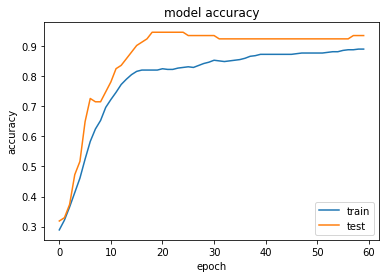

In [3]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

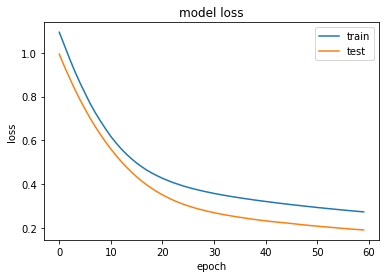

In [4]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [5]:
#Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_test_pred)
print(cm)

[[68  4]
 [ 4 38]]


In [6]:
feature_names = ['radius_mean', 'texture_mean', 'perimeter_mean', 'smoothness_mean', 
                 'area_mean', 'concavity_mean', 'compactness_mean', 
                 'texture_se', 'area_se', 'fractal_dimension_mean']

from pdpbox import pdp, get_dataset, info_plots


def pdpplot( feature_to_plot, pdp_model = my_model, pdp_dataset = X_test, pdp_model_features = feature_names):
    pdp_cancer = pdp.pdp_isolate(model=pdp_model, dataset=pdp_dataset, model_features=pdp_model_features, feature=feature_to_plot)
    fig, axes = pdp.pdp_plot(pdp_cancer, feature_to_plot, figsize = (10, 5),plot_params={})
    

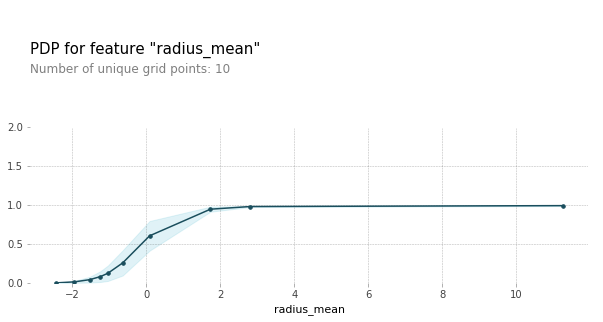

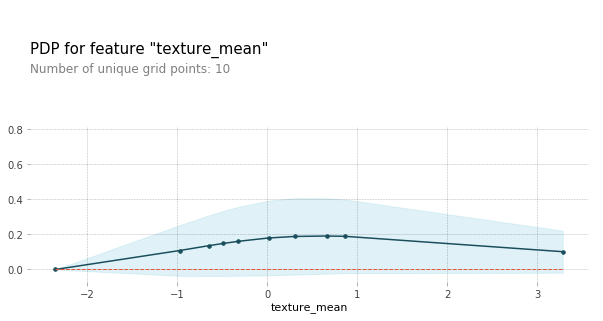

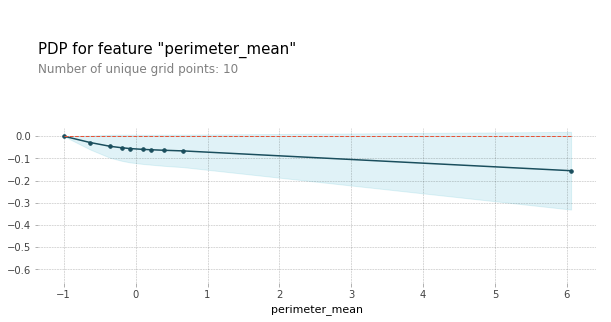

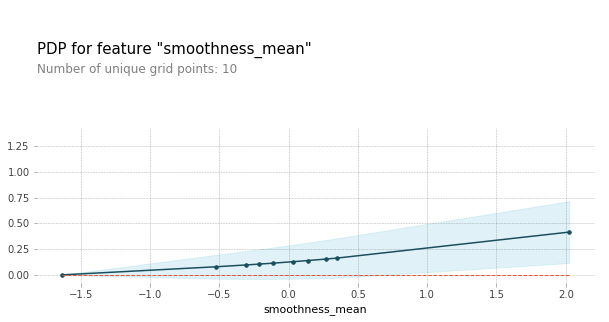

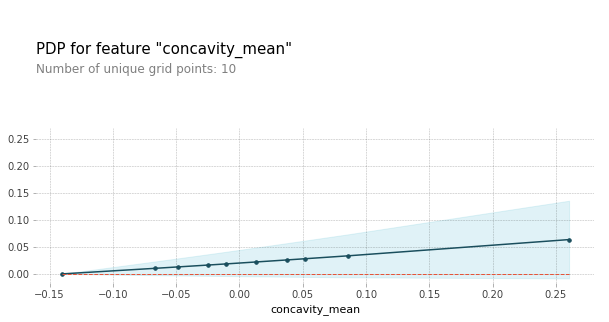

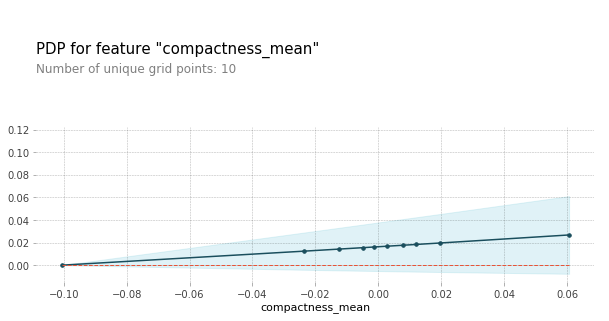

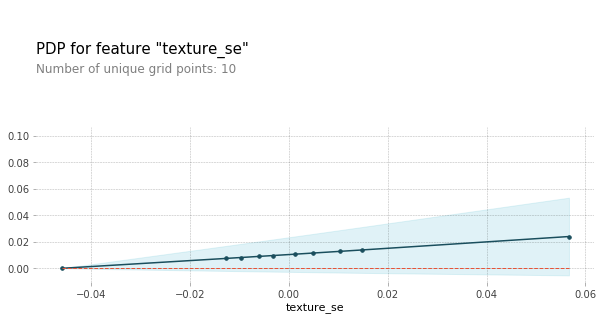

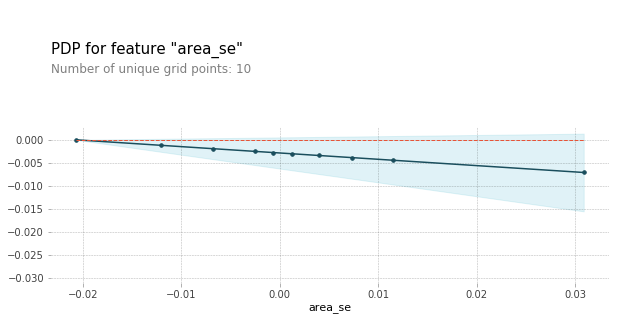

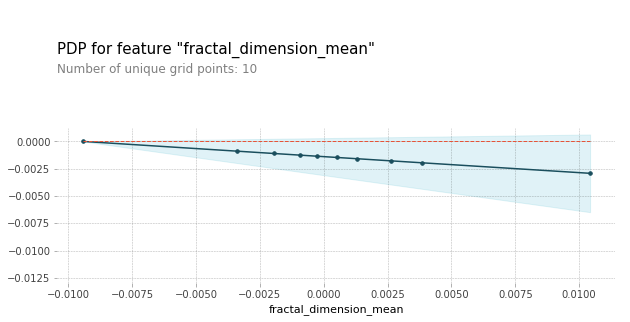

In [7]:
pdpplot('radius_mean')
pdpplot('texture_mean')
pdpplot('perimeter_mean')
pdpplot('smoothness_mean')
pdpplot('concavity_mean')
pdpplot('compactness_mean')
pdpplot('texture_se')
pdpplot('area_se')
pdpplot('fractal_dimension_mean')

plt.show()